# Advanced plotting

Let's plot a composition with orography as contourlines, relative humidity at 2m, wind at 10m and add also superpose the location of an observation on top of that

In [1]:
%matplotlib inline
import os
import epygram
epygram.init_env()  # initialisation of environment, for FA/LFI and spectrals transforms sub-libraries
workdir = epygram.config.userlocaldir + '/notebooks_data'
os.chdir(workdir)

In [2]:
fcst1 = epygram.formats.resource('advanced_examples/ICMSHAROM+0001', 'r')

In [3]:
fcst1.find_fields_in_resource('CLS*')  # look for all CLS fields

['CLSVENT.ZONAL',
 'CLSVENT.MERIDIEN',
 'CLSTEMPERATURE',
 'CLSHUMI.RELATIVE',
 'CLSHUMI.SPECIFIQ',
 'CLSMINI.TEMPERAT',
 'CLSMAXI.TEMPERAT',
 'CLSU.RAF.MOD.XFU',
 'CLSV.RAF.MOD.XFU']

In [4]:
rh2m = fcst1.readfield('CLSHUMI.RELATIVE')  # relative humidity at 2m
u10 = fcst1.readfield('CLSVENT.ZONAL')  # zonal wind at 10m
v10 = fcst1.readfield('CLSVENT.MERIDIEN')  # meridian wind at 10m

In [5]:
orog = fcst1.readfield('SPECSURFGEOPOTEN')  # surface geopotential
orog.spectral

True

In [6]:
orog.sp2gp()
orog.spectral

False

In [7]:
orog.operation('/', 9.81)  # convert geopotential to orography

In [8]:
obs = epygram.formats.resource('advanced_examples/Toulouse_2015-02-16.nc', 'r')  # an obs file at Toulouse

In [9]:
obs.listfields()

[u'time',
 u'P_AIR',
 u'T_AIR_ABRI_5M',
 u'FLAG_T_AIR_ABRI_5M',
 u'HU_AIR_ABRI_5M',
 u'HUMSPEC_ABRI_5M',
 u'RAY_RGM',
 u'RAY_RGD',
 u'RAY_IRM',
 u'RAY_IRD',
 u'TPR_SOL_3CM',
 u'DD_GILL_2.5M',
 u'FF_GILL_2.5M',
 u'FLAG_GILL_2.5M',
 u'DD_GILL_5M',
 u'FF_GILL_5M',
 u'FLAG_GILL_5M',
 u'DD_GILL_7.5M',
 u'FF_GILL_7.5M',
 u'FLAG_GILL_7.5M',
 u'DD_GILL_10M',
 u'FF_GILL_10M',
 u'FLAG_GILL_10M',
 u'longitude',
 u'latitude']

In [10]:
rh5m_obs = obs.readfield('HU_AIR_ABRI_5M')  # read a series of relative humidity on obs point
print(type(rh5m_obs))

<class 'epygram.fields.PointField.PointField'>


In [11]:
print(len(rh5m_obs.validity))
print(rh5m_obs.validity[0].get(), '--->', rh5m_obs.validity[-1].get())

1440
(datetime.datetime(2015, 2, 16, 0, 1), '--->', datetime.datetime(2015, 2, 17, 0, 0))


In [12]:
rh5m_obs = rh5m_obs.getvalidity(rh2m.validity[0])  # extract the point at the validity of the model
print(rh5m_obs.validity.get())

2015-02-16 01:00:00


In [13]:
# pre-compute the basemap, more efficient, with specific 'near-sided perspective' projection
bm = orog.geometry.make_basemap(specificproj=('nsper', {'sat_height':600, 'lon':0, 'lat':45.6}))
# recompose wind vector field
wind = epygram.fields.make_vector_field(u10, v10)
# compute coordinates of the obs in the basemap referential
x, y = bm(rh5m_obs.geometry.grid['longitudes'], rh5m_obs.geometry.grid['latitudes'])

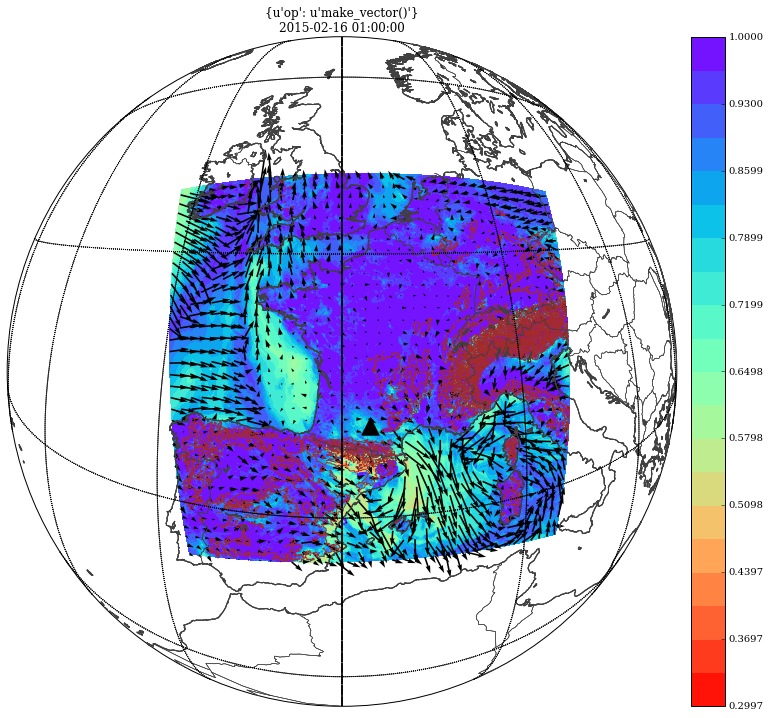

In [14]:
# plot orography
fig, ax = orog.plotfield(use_basemap=bm,
                         graphicmode='contourlines', levelsnumber=9, minmax=(500, 4500),
                         contourcolor='brown', contourlabel=None, subzone='C')
# plot relative humidity
fig, ax = rh2m.plotfield(over=(fig,ax), use_basemap=bm,
                         graphicmode='colorshades', colormap='rainbow_r', subzone='C')
# plot wind
fig, ax = wind.plotfield(over=(fig, ax), use_basemap=bm,
                         plot_module=False, symbol='arrows', subsampling=20, subzone='C')
# plot the obs
bm.scatter(x, y, s=300, c='black', marker='^', ax=ax)